In [273]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


import pandas as pd

df = pd.read_csv("train.csv")

In [274]:

#reading the data from the disk into memory
df = pd.read_csv("train.csv")

In [275]:

#Just a reminder, here are all the column names
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [276]:
#I'm going to create a new dataframe and put 6 variables I'm going to be using into it.
X = pd.DataFrame()
X['age'] = df['Age']
X['survived'] = df['Survived']
X['Pclass'] = df['Pclass']
X['Embarked'] = df['Embarked']
X['Fare'] = df['Fare']
X['Sex'] = df['Sex']

In [277]:

#I'm going to drop missing values.   That's probably NOT the best strategy, but it's usually good to start simple and 
#build complexity as you go.
X = X.dropna(axis=0)

In [278]:

#survived will be my dependent variable, y.   I'll assign it to y and remove it from X
y = X['survived']
X = X.drop(['survived'], axis=1)

In [279]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [280]:
# The following code is from: http://brettromero.com/wordpress/data-science-kaggle-walkthrough-data-transformation-feature-extraction 
# Home made One Hot Encoding function
def convert_to_binary(df, column_to_convert):
    categories = list(df[column_to_convert].drop_duplicates())

    for category in categories:
        cat_name = str(category).replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_").replace("-", "").lower()
        col_name = column_to_convert[:5] + '_' + cat_name[:10]
        df[col_name] = 0
        df.loc[(df[column_to_convert] == category), col_name] = 1

    return df

In [281]:
# Use the above One Hot Encoding for the columns shown below
print("One Hot Encoding categorical data...")
columns_to_convert = ['Pclass', 'Embarked','Sex']

for column in columns_to_convert:
    X = convert_to_binary(df=X, column_to_convert=column)
    X.drop(column, axis=1, inplace=True)


One Hot Encoding categorical data...


In [282]:
X.head()

,age,Fare,Pclas_3,Pclas_1,Pclas_2,Embar_s,Embar_c,Embar_q,Sex_male,Sex_female
0,22.0,7.2500,1,0,0,1,0,0,1,0
1,38.0,71.2833,0,1,0,0,1,0,0,1
2,26.0,7.9250,1,0,0,1,0,0,0,1
3,35.0,53.1000,0,1,0,1,0,0,0,1
4,35.0,8.0500,1,0,0,1,0,0,1,0


In [283]:
#I chose only Pclas_3, Embar_q and Sex_male columns (i.e. delet the following)
X = X.drop(['Pclas_1'], axis=1)

In [284]:
X = X.drop(['Pclas_2'],axis=1)

In [285]:
X = X.drop(['Sex_female'], axis=1)

In [286]:
X = X.drop(['Embar_c'], axis=1)

In [287]:
X = X.drop(['Embar_s'], axis=1)

In [288]:
X.head()

,age,Fare,Pclas_3,Embar_q,Sex_male
0,22.0,7.2500,1,0,1
1,38.0,71.2833,0,0,0
2,26.0,7.9250,1,0,0
3,35.0,53.1000,0,0,0
4,35.0,8.0500,1,0,1


In [289]:
#remember to scale our features, as with linear regression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [290]:
#build test and training sets (10% for testing, It could be overfiting)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [291]:

#This function looks for male, Pclass: 3 and Emarked:Q in the test set and returns 1, survived, otherwise it returns 0
def base_rate_model(X):
    y = np.zeros(X.shape[0])
    return y

In [292]:
#how accurate is my base rate model?
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.58


In [293]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

In [294]:
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [295]:

print("Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test)))

Logistic accuracy is 0.82


In [296]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [297]:

print("---Base Model---")
#base rate AUC
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test,base_rate_model(X_test) ))
print("\n\n---Logistic Model---")
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, model.predict(X_test) ))

---Base Model---
Base Rate AUC = 0.50
             precision    recall  f1-score   support

          0       0.58      1.00      0.74        42
          1       0.00      0.00      0.00        30

avg / total       0.34      0.58      0.43        72



---Logistic Model---
Logistic AUC = 0.81
             precision    recall  f1-score   support

          0       0.82      0.88      0.85        42
          1       0.81      0.73      0.77        30

avg / total       0.82      0.82      0.82        72



In [298]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

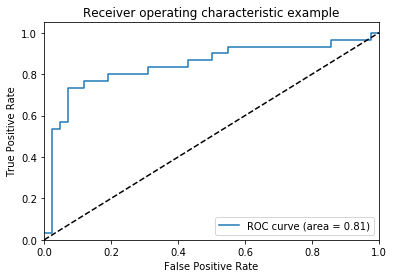

In [299]:

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()